# Econometrics for the Biological Sciences

## Fundamental Concepts

- Regression
  - Study of conditional distributions
- Level I, II, and III analysis
- Models vs. Algorithms
- Estimation vs. Inference
  - Inference: Goal is to use a sample to say something about the population.
- Econometrics vs. Statistical Learning vs. ML
- Experimental vs. Quasi-Experimental vs. Observational
- Degrees of Freedom
- Counterfactual
- Average Treatment Effect
- Average Treatment on the Treated
- Bias
- Consistency
  - A consistent estimator is one that converges to the target value as the sample size gets larger
- Power
- Sampling Distribution
- Null Hypothesis $H_0$
- Alternative Hypothesis $H_A$
- Sufficient Statistic

### Objectives

1. Identification
2. Unbiased estimate of the treatment effect
3. Valid standard errors for the treatment effect
4. Explanation

### Causality
- Neyman-Rubin Causal Model
- Gauss-Markov Theorem (OLS is BLUE)

### Some Problems

Small effect sizes + Noisy Measurements + RCT = Difficult Estimation Task

Small effect sizes + Noisy Measurements - RCT = **Extremely** Difficult Estimation Task

**Experimental Flaws**
1. Spill over effects
2. Insufficient Randomization
3. **Attrition**
4. **Partial Compliance**

Existence of experimental flaws requires that additional methods be applied on top of traditional methods. Usually thought of as techniques for handling quasi-experimental data

**Data Analysis/Modelling Problems**
1. Model misspecification error
2. Omitted variable bias (Confounding)
3. Selection bias
  - Population studied may not be representative of the population of interest (returns to college education)
  - Not the same joint probability distribution
4. Endogeneity Bias (Simultenaity)
  - Non-random treatment assignment
5. Measurement Error
6. Data Snooping/Model Selection

## Running Example: Estimating the Effect of Free Breakfast on Academic Achievement

- Students are the primary observation unit
- Free breakfast was provided to some students but not others
- Outcome of interest are scores on a standardized test

## Core Techniques

- Multiple Regression
- Difference-in-Difference
  - Estimate a treatment effect when baseline data is available prior to treatment
- Fixed Effects
- Matching
  - Overcome non-random treatment assignment
- Instrumental Variables
  - Overcome omitted variable bias and endogeneity bias
- Regression Discontinuity
  - Exploits thresholds (and entities just on either sides of them)

## Other Techniques
- Multi-level modelling
- Synthetic Controls
  - Use weighting to get a better control group

## Machine Learning for Causal Inference

- BART
- SuperLearner
- Causal Trees/Forests
- DoubleML

## Differential Treatment Effects
- Fixed Effects models (fixed effect for each entity)
- Hierarchical model where treatment effects come from a common distribution
- Add interaction terms
- ML for CI

## Case Study: Estimating Heterogeneous Treatment Effects

## Resources

### Books
- [Statistical Learning from a Regression Perspective]
- [Data Analysis Using Regression and Multilevel/Hierarchical Models]
- [Mostly Harmless Econometrics]
- [Introduction to Statistical Learning]
- [Elements of Statistical Learning]
- [Introductory Econometrics: A Modern Approach]
- [Econometric Analysis of Cross Section and Panel Data]
- [Introduction to Econometrics]

### Papers

### Blogs
- [Causal Forest Intro](https://www.markhw.com/blog/causalforestintro)

### Software
- [Personalized]
- [FindIt]
- [uplift]
- [BART]
- [grf]

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from scipy.stats import ttest_1samp, ttest_ind
from sklearn.datasets import make_spd_matrix

sns.set_style("darkgrid")

## Back to Basics

Text(0.5, 1.0, "Student's t and Normal Distribution")

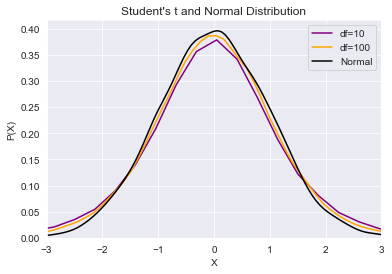

In [3]:
t_dist_5 = np.random.standard_t(df=5, size=100000)
t_dist_10 = np.random.standard_t(df=10, size=100000)
normal = np.random.standard_normal(size=10000)

fig, ax = plt.subplots()
sns.distplot(t_dist_5, hist=False, rug=False, ax=ax, label="df=10", color="purple")
sns.distplot(t_dist_10, hist=False, rug=False, ax=ax, label="df=100", color="orange")
sns.distplot(normal, hist=False, rug=False, ax=ax, label="Normal", color="black")
ax.set_xlim(-3, 3)
ax.set_xlabel("X")
ax.set_ylabel("P(X)")
ax.set_title("Student's t and Normal Distribution")

- As $n \rightarrow \infty$, $T \approx N$
- Student's t distribution does not depend on $\mu$ or $\sigma^2$, which are the unknown parameters of interest if our population being sampled is normally distributed
- Can be used for establishing confidence intervals for the population mean

Text(75, 0.001, 'True Mean')

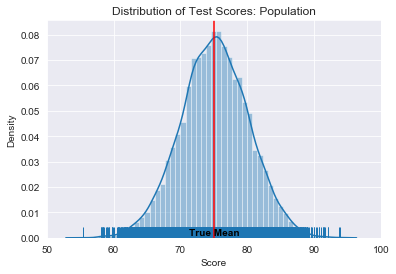

In [4]:
natures_students = np.random.normal(loc=75, scale=5, size=10000)\

fig, ax = plt.subplots()
sns.distplot(natures_students, rug=True, norm_hist=True, ax=ax)
ax.axvline(75, 0, 1, color="r")
ax.set_title("Distribution of Test Scores: Population")
ax.set_xlabel("Score")
ax.set_xlim(50, 100)
ax.set_ylabel("Density")
ax.text(75, 0.001, "True Mean", horizontalalignment='center', size='medium', color='black', weight='semibold')

Text(0, 0.5, 'Density')

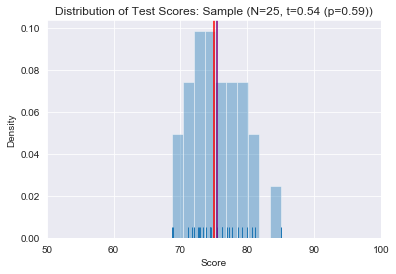

In [5]:
sample_students = np.random.normal(loc=75, scale=5, size=25)

t, p_val = ttest_1samp(sample_students, 75)

fig, ax = plt.subplots()
sns.distplot(sample_students, bins=10, kde=False, rug=True, norm_hist=True, ax=ax)
ax.axvline(75, 0, 1, color="r")
ax.axvline(np.mean(sample_students), 0, 1, color="purple")
ax.set_xlim(50, 100)
ax.set_title("Distribution of Test Scores: Sample (N=25, t={} (p={}))".format(round(t, 2), round(p_val, 2)))
ax.set_xlabel("Score")
ax.set_ylabel("Density")

Text(0.905, 0.8, '0.10: 93/1000 (0.09)')

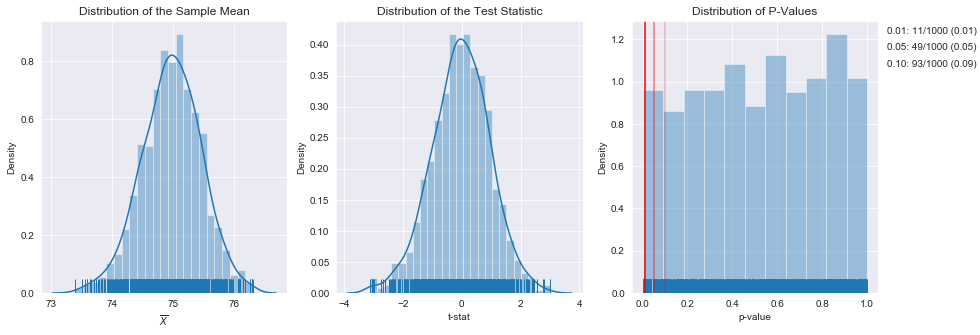

In [34]:
repeated_samples = np.random.normal(loc=75, scale=5, size=(100, 1000))
sample_means = np.mean(repeated_samples, axis=0)
t_stats, p_vals = ttest_1samp(repeated_samples, 75)

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

sns.distplot(sample_means, kde=True, rug=True, norm_hist=True, ax=ax[0])
ax[0].set_title("Distribution of the Sample Mean")
ax[0].set_xlabel("$\overline{X}$")
ax[0].set_ylabel("Density")

sns.distplot(t_stats, kde=True, rug=True, norm_hist=True, ax=ax[1])
ax[1].set_title("Distribution of the Test Statistic")
ax[1].set_xlabel("t-stat")
ax[1].set_ylabel("Density")

sns.distplot(p_vals, kde=False, rug=True, norm_hist=True, ax=ax[2])
ax[2].set_title("Distribution of p-values")
ax[2].set_xlabel("p-value")
ax[2].set_ylabel("Density")
ax[2].axvline(0.01, 0, 1, color="r", alpha=1.0)
ax[2].axvline(0.05, 0, 1, color="r", alpha=0.5)
ax[2].axvline(0.10, 0, 1, color="r", alpha=0.25)

thresh_01 = len(np.where(p_vals < 0.01)[0])
thresh_05 = len(np.where(p_vals < 0.05)[0])
thresh_10 = len(np.where(p_vals < 0.10)[0])

ax[2].annotate('0.01: {}/1000 ({})'.format(thresh_01, round(thresh_01 / 1000, 2)), 
               xy=(.905, .9), 
               xycoords="figure fraction")
ax[2].annotate('0.05: {}/1000 ({})'.format(thresh_05, round(thresh_05 / 1000, 2)), 
               xy=(.905, .85), 
               xycoords="figure fraction")
ax[2].annotate('0.10: {}/1000 ({})'.format(thresh_10, round(thresh_10 / 1000, 2)), 
               xy=(.905, .80), 
               xycoords="figure fraction")

- Single sample mean $\sim T(n - 1)$
- Distribution of sample means based on a normally-distributed population is normally distributed (CLT)
- Distribution of the test-statistic follow standard normal distribution
- p-values are approximately uniformly distributed. Chosen cut offs are completely arbitrary

## OLS

The following thought experiment underlies the standard linear regression model:
1. For each case $i$, Mother Nature establishes the values of each of the predictors
2. Mother Nature then multiplies each predictor by its corresponding coefficient
3. Mother Nature sums the products from (2) and adds the value of the constant
4. Mother Nature then adds a random perturbation

The goal of the data analyst is to back-out the coefficients that Mother Nature used to generate the data. OLS is the the estimator used to accomplish the task.

First Order Conditions

- The predictors used by Mother Nature are known
- The transformations used by Mother Nature are known
- The predictors are known to be combined in a linear fashion
- The predictors are available in the data

Second Order Conditions

- Each perturbation is realized idepedently of all other perturbations and all come from the same distribution with expectation 0 $$\epsilon_i \sim NIID(0, \sigma^2)$$

Distributions of the estimated coefficients is approximately normal when the sample size is large. How large is large though?

### Treatment-Only

Text(0, 0.5, 'Density')

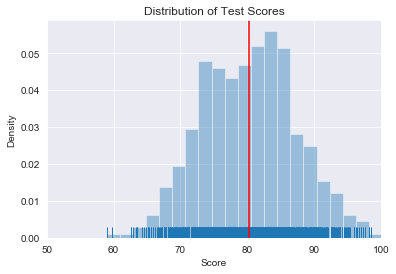

In [88]:
sample_size = 1000
treatment = np.random.choice([0, 1], sample_size)
test_scores = 75 + 10*treatment + np.random.normal(scale=5.0, size=sample_size)

treatment_only_df = pd.DataFrame()
treatment_only_df["treated"] = treatment
treatment_only_df["score"] = test_scores

fig, ax = plt.subplots()
sns.distplot(test_scores, kde=False, rug=True, norm_hist=True, ax=ax)
ax.axvline(np.mean(test_scores), 0, 1, color="r")
ax.set_xlim(50, 100)
ax.set_title("Distribution of Test Scores".format(round(t, 2), round(p_val, 2)))
ax.set_xlabel("Score")
ax.set_ylabel("Density")

In [89]:
model = smf.ols(formula="score ~ 1 + treatment", data=treatment_only_df)
result = model.fit(use_t=True)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     840.4
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          1.51e-134
Time:                        21:08:00   Log-Likelihood:                -3063.6
No. Observations:                1000   AIC:                             6131.
Df Residuals:                     998   BIC:                             6141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.3452      0.235    321.035      0.000      74.885      75.805
treatment      9.5086      0.328     28.990      0.000       8.866      10.151
==============================================================================
Omnibus:                        1.684   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.753
Skew:                           0.094   Prob(JB):                        0.416
Kurtosis:                       2.917   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(85.25383051530872, 49.4, '9.51')

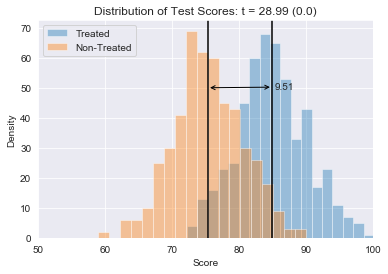

In [91]:
treated = test_scores[np.where(treatment == 1)]
untreated = test_scores[np.where(treatment == 0)]

t_stat, p_val = ttest_ind(treated, untreated)

fig, ax = plt.subplots()
sns.distplot(treated, kde=False, label="Treated", ax=ax)
sns.distplot(untreated, kde=False, label="Non-Treated", ax=ax)
ax.axvline(np.mean(treated), 0, 1, color="black")
ax.axvline(np.mean(untreated), 0, 1, color="black")
ax.set_xlim(50, 100)
ax.set_title("Distribution of Test Scores: t = {} ({})".format(round(t_stat, 3), round(p_val, 3)))
ax.set_xlabel("Score")
ax.set_ylabel("Density")
ax.legend()
ax.annotate('{}'.format(round(np.mean(treated) - np.mean(untreated), 2)),
            xy=(np.mean(untreated),50), xytext=(np.mean(treated) + 0.4,49.4), 
            arrowprops=dict(arrowstyle='<->', color="black"))

- $H_0$: The test scores for treated and non-treated individuals are the same
- $H_A$: The test scores for treated and non-treated individuals are different
- The test-statistic from a two sample t-test of the means is identical to the z score reported in the regression summary with only treatment and an intercept

### Omitted Variable

Text(0, 0.5, 'Density')

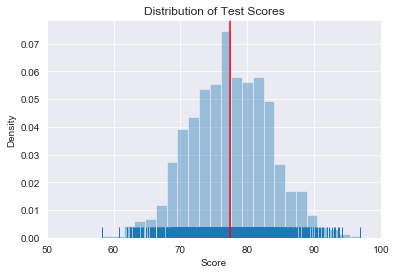

In [142]:
sample_size = 1000
treatment = np.random.choice([0, 1], sample_size)

random_cov = make_spd_matrix(2)
random_a, random_b = np.random.multivariate_normal([0, 0], random_cov, sample_size).T

test_scores = 75 + 5*treatment + random_a + random_b + np.random.normal(scale=5.0, size=sample_size)

ovb_df = pd.DataFrame()
ovb_df["treatment"] = treatment
ovb_df["a"] = random_a
ovb_df["b"] = random_b
ovb_df["score"] = test_scores

fig, ax = plt.subplots()
sns.distplot(test_scores, kde=False, rug=True, norm_hist=True, ax=ax)
ax.axvline(np.mean(test_scores), 0, 1, color="r")
ax.set_xlim(50, 100)
ax.set_title("Distribution of Test Scores".format(round(t, 2), round(p_val, 2)))
ax.set_xlabel("Score")
ax.set_ylabel("Density")

In [143]:
if (random_cov[0][0] > random_cov[1][1]):
    formula = "score ~ 1 + treatment + random_b"
else:
    formula = "score ~ 1 + treatment + random_a"
    
model = smf.ols(formula=formula, data=ovb_df)
result = model.fit(use_t=True)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.25e-63
Time:                        21:40:04   Log-Likelihood:                -3057.6
No. Observations:                1000   AIC:                             6121.
Df Residuals:                     997   BIC:                             6136.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.1791      0.230    326.846      0.000      74.728      75.630
treatment      4.4762      0.326     13.717      0.000       3.837       5.116
random_a       1.1465      0.099     11.576      0.000       0.952       1.341
==============================================================================
Omnibus:                        0.327   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.415
Skew:                           0.015   Prob(JB):                        0.813
Kurtosis:                       2.905   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
model = smf.ols(formula="score ~ 1 + treatment + random_a + random_b", data=ovb_df)
result = model.fit(use_t=True)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           9.56e-72
Time:                        21:40:04   Log-Likelihood:                -3035.5
No. Observations:                1000   AIC:                             6079.
Df Residuals:                     996   BIC:                             6099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.1424      0.225    333.725      0.000      74.701      75.584
treatment      4.4851      0.319     14.044      0.000       3.859       5.111
random_a       1.0609      0.098     10.853      0.000       0.869       1.253
random_b       1.2654      0.189      6.711      0.000       0.896       1.635
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.675
Skew:                           0.031   Prob(JB):                        0.714
Kurtosis:                       2.888   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
np.mean(random_a)

-0.012088159846046671

In [146]:
np.mean(random_b)

0.024619386073054274

In [147]:
random_cov

array([[2.69893589, 0.12918308],
       [0.12918308, 0.68787382]])